# Background

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:
* BOROUGH : A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* BLOCK; LOT :The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: : The type of building at various points in time.


Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:
* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.


## Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
import datetime
%matplotlib inline

In [69]:
df = pd.read_csv('./Dataset/nyc-rolling-sales.csv', skipinitialspace=True)
df

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,NaN,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,NaN,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,NaN,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,NaN,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [71]:
df.shape

(84548, 22)

In [72]:
df.isnull().sum().sort_values(ascending=False)

EASE-MENT                         84548
APARTMENT NUMBER                  65496
TAX CLASS AT PRESENT                738
BUILDING CLASS AT PRESENT           738
Unnamed: 0                            0
COMMERCIAL UNITS                      0
SALE PRICE                            0
BUILDING CLASS AT TIME OF SALE        0
TAX CLASS AT TIME OF SALE             0
YEAR BUILT                            0
GROSS SQUARE FEET                     0
LAND SQUARE FEET                      0
TOTAL UNITS                           0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
BOROUGH                               0
ADDRESS                               0
LOT                                   0
BLOCK                                 0
BUILDING CLASS CATEGORY               0
NEIGHBORHOOD                          0
SALE DATE                             0
dtype: int64

In [73]:
# drop'Unnamed: 0' since the columns not related to analytical process
df.drop('Unnamed: 0', axis=1, inplace=True)

In [74]:
#'EASE-MENT' column is blank and can be dropped
df.drop('EASE-MENT', axis=1, inplace=True)


In [75]:
# 'ADDRESS' and 'APARTMENT NUMBER' are irrelevant to our statistical data analysis
df.drop(labels=['ADDRESS','APARTMENT NUMBER'], axis=1, inplace=True)

In [76]:
#'SALE PRICE' should be numeric, missing value will be set to NaN
df['SALE PRICE']= pd.to_numeric(df['SALE PRICE'], errors='coerce')
# 'LAND SQUARE FEET' and 'GROSS SQUARE FEET' should be numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# 'SALE DATE' should be datetime
df['SALE DATE']=pd.to_datetime(df['SALE DATE'], errors='coerce')
# the columns below should be categorical
categorical = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
         'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categorical:
    df[col] = df[col].astype('category')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            83810 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83810 non-null  category      
 7   ZIP CODE                        84548 non-null  int64         
 8   RESIDENTIAL UNITS               84548 non-null  int64         
 9   COMMERCIAL UNITS                84548 non-null  int64         
 10  TOTAL UNITS                     84548 non-null  int64         
 11  LA

In [78]:
df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [79]:
missing_value = df.isnull().sum()/len(df)*100
print(pd.DataFrame([missing_value[missing_value>0], pd.Series(df.isnull().sum()[df.isnull().sum()>1000])],
                  index=['percent missing', 'num of missing']))

                 TAX CLASS AT PRESENT  BUILDING CLASS AT PRESENT  \
percent missing              0.872877                   0.872877   
num of missing                    NaN                        NaN   

                 LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE  
percent missing         31.049818          32.658372     17.22217  
num of missing       26252.000000       27612.000000  14561.00000  


terdapat sekitar 30% missing value yang terdapat pada LAND and GROSS SQUARE FEET, dan terdapat sekitar 17% missing value pada column SALE PRICE.  

In [85]:
df['SALE PRICE'].describe()

count    4.824400e+04
mean     1.153281e+06
std      1.340131e+07
min      0.000000e+00
25%      8.042000e+04
50%      4.800000e+05
75%      8.300000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

since there's a lot of nan value in 'SALE PRICE' column, Plot data and see the outliers


In [83]:
# remove all null values
df=df[df['SALE PRICE'].notnull()]
df=df[df['LAND SQUARE FEET'].notnull()]
df=df[df['GROSS SQUARE FEET'].notnull()]

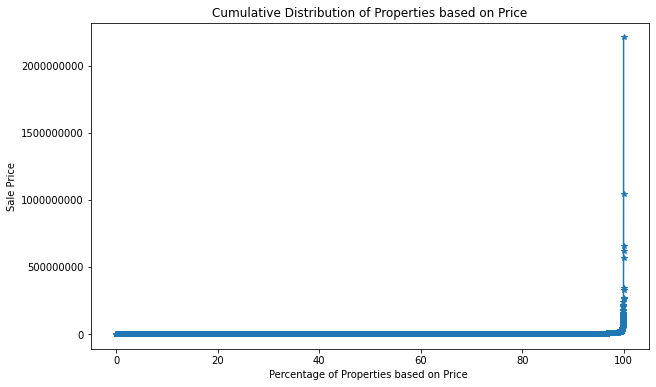

In [95]:
#get data property proportion
x= df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

#set size for the plot
plt.figure(figsize=(10,6))

#plot the data
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()

Untuk menghilangkan outliers kita bisa mengambil data antara 100.000 USD sampai 5000.000 USD

In [97]:
df= df[(df['SALE PRICE']>100000) & (df['SALE PRICE']<5000000)]

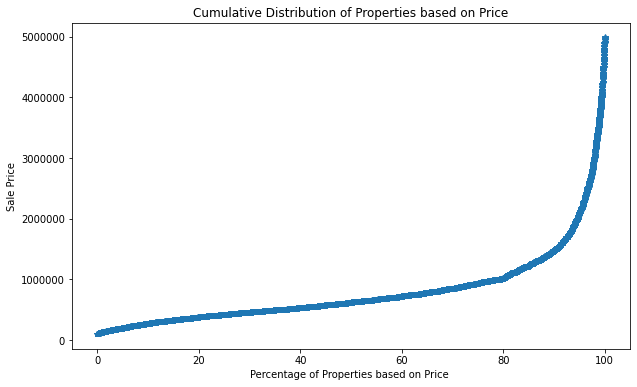

In [98]:
# do the same as above to get data property proportion and plot the data, then see the result
x = df[['SALE PRICE']].sort_values(by='SALE PRICE').reset_index()
x['PROPERTY PROPORTION']= 1
x['PROPERTY PROPORTION']= x['PROPERTY PROPORTION'].cumsum()
x['PROPERTY PROPORTION'] = 100 * x['PROPERTY PROPORTION']/len(x['PROPERTY PROPORTION'])

plt.figure(figsize=(10,6))
plt.plot(x['PROPERTY PROPORTION'], x['SALE PRICE'], linestyle=None, marker='*')
plt.title("Cumulative Distribution of Properties based on Price")
plt.xlabel("Percentage of Properties based on Price ")
plt.ylabel("Sale Price")
plt.ticklabel_format(style='plain',axis='y')
plt.show()


Data distribusi sudah tidak ada outliers

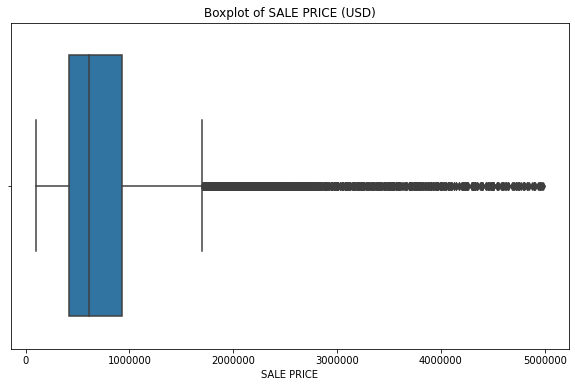

In [99]:
# plot curve using boxplot to see another view of the data
plt.figure(figsize=(10,6))
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title("Boxplot of SALE PRICE (USD)")
plt.show()


ploting menggunakan kurva boxplot dapat kita lihat sudah tidak ada outliers, data sudah lebih baik

In [112]:
mean = df['SALE PRICE'].mean()
median= df['SALE PRICE'].median()
print(mean)
print(median)

795438.5577033713
615000.0


/home/dotachin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


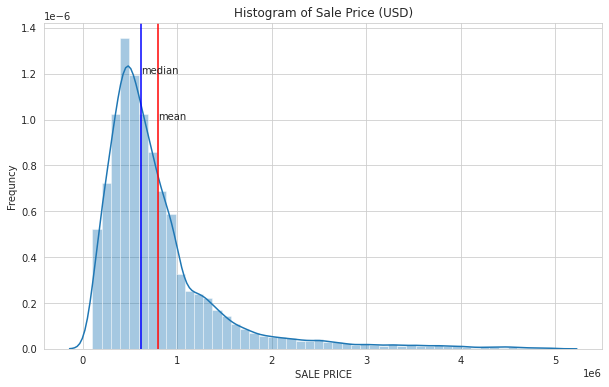

In [122]:
#let's take a look distribution of the data, the data is skewness or normal distribution
plt.figure(figsize=(10,6))
sns.distplot(df['SALE PRICE'])
plt.title('Histogram of Sale Price (USD)')
plt.ylabel("Frequncy")
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].mean(), c='red')
plt.axvline(df[(df['SALE PRICE']>100000) & (df['SALE PRICE'] < 5000000)]['SALE PRICE'].median(), c='blue')
plt.text(median,0.0000012, "median")
plt.text(mean,0.0000010, "mean")
plt.show()

Sebaran data diatas menunjukkan adanya positive skewness karena nilai Mean lebih besar daripada Median